In [1]:
# Name :- LUXSHAN S.
# Index No :- 190364C
# Github Link :- https://github.com/luxshan21/Image_Processing_Works_190364C.git

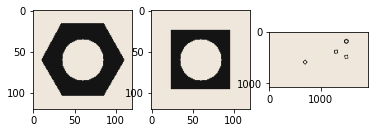

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

Threshold value for the hexnut_template image :  20.0
Threshold value for the squarenut_template image :  20.0
Threshold value for the conveyor_f100 image :  20.0


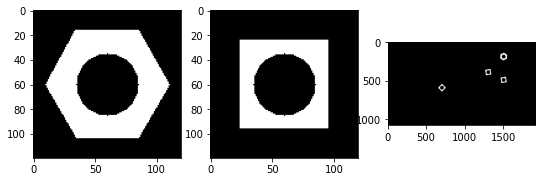

In [13]:
th_hexnut_template, img_hexnut = cv.threshold(cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY),0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU) # simple thresholding + Otsu thresholding
th_squarenut_template, img_squarenut = cv.threshold(cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY),0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
th_conveyor_f100, img_conveyor = cv.threshold(cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY),0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

fig, ax = plt. subplots(1,3,figsize=(9,9))
print("Threshold value for the hexnut_template image : ",th_hexnut_template)
print("Threshold value for the squarenut_template image : ",th_squarenut_template)
print("Threshold value for the conveyor_f100 image : ",th_conveyor_f100)
ax[0].imshow(img_hexnut, cmap='gray')
ax[1].imshow(img_squarenut, cmap='gray')
ax[2].imshow(img_conveyor, cmap='gray')
plt.show()

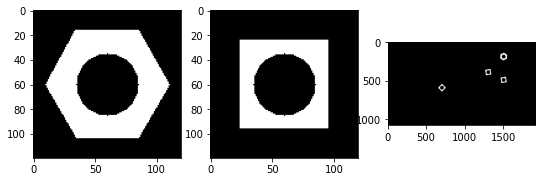

In [14]:
kernel = np.ones((3,3),dtype=np.uint8) 
closing_hexnut_template = cv.morphologyEx(img_hexnut, cv.MORPH_CLOSE, kernel) # obtaining the morphological closing of thresholded images using kernal
closing_squarenut_template = cv.morphologyEx(img_squarenut, cv.MORPH_CLOSE, kernel)
closing_conveyor_f100 = cv.morphologyEx(img_conveyor, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(1,3,figsize=(9,9))
ax[0].imshow(img_hexnut, cmap='gray')
ax[1].imshow(img_squarenut, cmap='gray')
ax[2].imshow(img_conveyor, cmap='gray')
plt.show()

In [18]:

retval_hexnut_template, labels_hexnut_template, stats_hexnut_template, centroids_hexnut_template = cv.connectedComponentsWithStats(closing_hexnut_template)
retval_squarenut_template, labels_squarenut_template, stats_squarenut_template, centroids_squarenut_template = cv.connectedComponentsWithStats(closing_squarenut_template)
retval_conveyor_f100, labels_conveyor_f100, stats_conveyor_f100, centroids_conveyor_f100 = cv.connectedComponentsWithStats(closing_conveyor_f100)

print("Number of connected components detected in the hexnut_template image : ",retval_hexnut_template)
print("Number of connected components detected in the squarenut_template image : ",retval_squarenut_template)
print("Number of connected components detected in the conveyor_f100 image : ",retval_conveyor_f100)

#Statistics of the hexnut_template image
print(stats_hexnut_template)
#Statistics of the squarenut_template  image
print(stats_squarenut_template)
#Statistics of the  conveyor_f100  image
print(stats_conveyor_f100)

#Centroid of the hexnut_template image
print(centroids_hexnut_template)
#Centroid of the squarenut_template image
print(centroids_squarenut_template)
#Centroid of the conveyor_f100 image
print(centroids_conveyor_f100)

Number of connected components detected in the hexnut_template image :  2
Number of connected components detected in the squarenut_template image :  2
Number of connected components detected in the conveyor_f100 image :  5
[[   0    0  120  120 9672]
 [  10   16  101   88 4728]]
[[    0     0   120   120 11173]
 [   24    24    72    72  3227]]
[[      0       0    1920    1080 2059646]
 [   1454     150      92     100    4636]
 [   1259     359      82      82    3087]
 [   1459     459      82      82    3087]
 [    650     550     101     101    3144]]
[[59.33684864 59.63513234]
 [59.83375635 59.22356176]]
[[59.5875772  59.5875772 ]
 [59.19677719 59.19677719]]
[[ 957.36323524  540.44416273]
 [1499.24201898  199.28515962]
 [1299.18302559  399.18302559]
 [1499.18302559  499.18302559]
 [ 700.          600.        ]]


In [ ]:
# For the hexnut template, you should get the object area in pixel as approximately 4728.

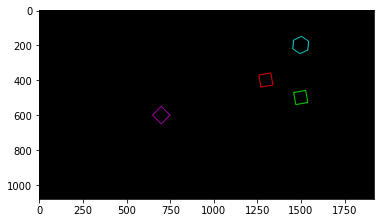

In [44]:
contours_hexnut_template, hierarchy_hexnut_template = cv.findContours(closing_hexnut_template, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) # source image, retrieval mode, contour approximation method
contours_squarenut_template, hierarchy_squarenut_template = cv.findContours(closing_squarenut_template, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours_conveyor_f100, hierarchy_conveyor_f100 = cv.findContours(closing_conveyor_f100, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Visualizing contours
im_contours_belt = np.zeros((cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY).shape[0],cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY).shape[1],3), np.uint8)
conts = cv.drawContours(im_contours_belt, contours_conveyor_f100, 0, (255,0,255), 3).astype('uint8') # -1 will draw all the contours
conts1 = cv.drawContours(im_contours_belt, contours_conveyor_f100, 2, (255,0,0), 3).astype('uint8')
conts2 = cv.drawContours(im_contours_belt, contours_conveyor_f100, 3, (0,255,255), 3).astype('uint8')
conts3 = cv.drawContours(im_contours_belt, contours_conveyor_f100, 1, (0,255,0), 3).astype('uint8')
plt.imshow(conts)
plt.imshow(conts1)
plt.imshow(conts2)
plt.imshow(conts3)
plt.show()

In [19]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
